## Predicting Sentiment from Tweets: Data Summary
#### Joseph Choi (nmf8dm), Mike Henry (ddj9rt), Kristen Lucas (kal4af)

At a minimum, the file should include a summary containing:
* Number of records
* Number of columns
* Statistical summary of response variable
* Statistical summary of potential predictor variables (if there are a large number of predictors, select the top 10)
* Note: Summarize categorical variables with counts and percentages for each level and summarize numerical variables with mean/quantiles/standard deviation.
* Include up to five helpful graphs

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

In [2]:
df = spark.read.csv("training.1600000.processed.noemoticon.csv")

df = df.withColumnRenamed("_c0", "label")\
 .withColumnRenamed("_c1", "id")\
 .withColumnRenamed("_c2", "date_time")\
 .withColumnRenamed("_c3", "Query_Boolean")\
 .withColumnRenamed("_c4", "Username")\
 .withColumnRenamed("_c5", "Content")

df.show(5)

+-----+----------+--------------------+-------------+---------------+--------------------+
|label|        id|           date_time|Query_Boolean|       Username|             Content|
+-----+----------+--------------------+-------------+---------------+--------------------+
|    0|1467810369|Mon Apr 06 22:19:...|     NO_QUERY|_TheSpecialOne_|@switchfoot http:...|
|    0|1467810672|Mon Apr 06 22:19:...|     NO_QUERY|  scotthamilton|is upset that he ...|
|    0|1467810917|Mon Apr 06 22:19:...|     NO_QUERY|       mattycus|@Kenichan I dived...|
|    0|1467811184|Mon Apr 06 22:19:...|     NO_QUERY|        ElleCTF|my whole body fee...|
|    0|1467811193|Mon Apr 06 22:19:...|     NO_QUERY|         Karoli|@nationwideclass ...|
+-----+----------+--------------------+-------------+---------------+--------------------+
only showing top 5 rows



In [3]:
positive = df.filter(df.label == 4)
negative = df.filter(df.label == 0)

### Number of Records

In [4]:
df.count()

1600000

### Number of Columns

In [5]:
len(df.columns)

6

### Statistical Summary of Response Variable

In [6]:
label_count = df.groupBy('label').count()
label_count.show()

+-----+------+
|label| count|
+-----+------+
|    0|800000|
|    4|800000|
+-----+------+



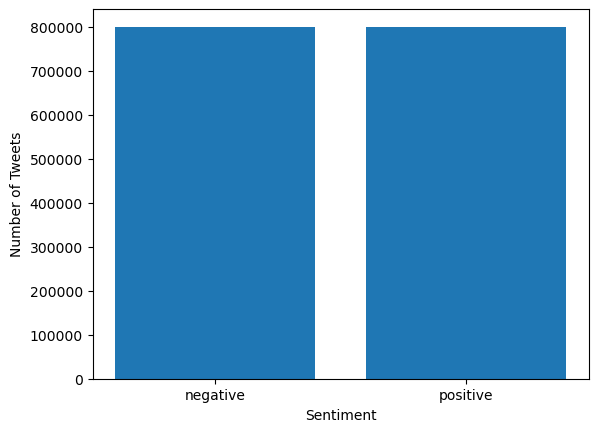

In [7]:
# Graph
import matplotlib.pyplot as plt

data = {'negative': 800000, 'positive': 800000}
sentiment = list(data.keys())
count = list(data.values())

# Plot
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.bar(sentiment, count)
plt.show()
# this looks dumb

### Statistical Summary of Potential Predictor Variables

#### Content

In [8]:
import pyspark.sql.functions as F

In [9]:
# Total Word Count
total_count = df.withColumn('wordCount', F.size(F.split(F.trim(F.col('Content')), ' ')))
total_count.describe('wordCount').show()

+-------+-----------------+
|summary|        wordCount|
+-------+-----------------+
|  count|          1600000|
|   mean|      13.60048375|
| stddev|7.169110135754223|
|    min|                1|
|    max|              109|
+-------+-----------------+



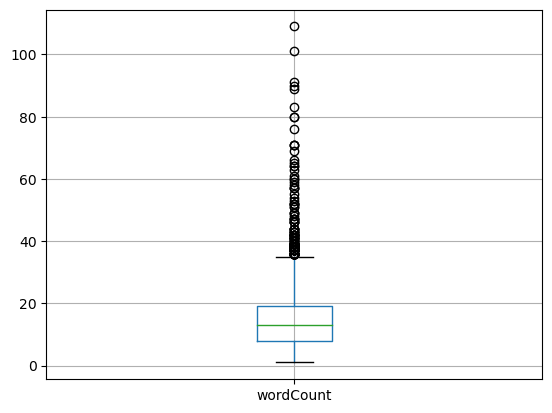

In [10]:
# Plot
total_count.toPandas().boxplot(column=["wordCount"])
plt.show()

In [11]:
# Positive Word Count
positive.withColumn('wordCount', F.size(F.split(F.trim(F.col('Content')), ' '))).describe('wordCount').show()

+-------+-----------------+
|summary|        wordCount|
+-------+-----------------+
|  count|           800000|
|   mean|      13.17943875|
| stddev|7.017350606818225|
|    min|                1|
|    max|              109|
+-------+-----------------+



In [12]:
# Negative Word Count
negative.withColumn('wordCount', F.size(F.split(F.trim(F.col('Content')), ' '))).describe('wordCount').show()

+-------+-----------------+
|summary|        wordCount|
+-------+-----------------+
|  count|           800000|
|   mean|      14.02152875|
| stddev|7.293461232922494|
|    min|                1|
|    max|               91|
+-------+-----------------+



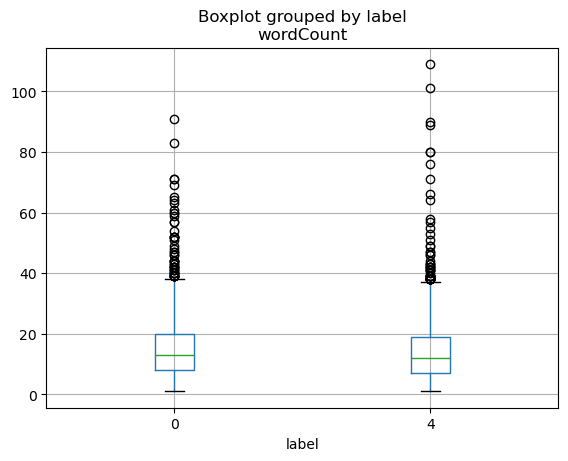

In [13]:
# Plot
total_count.toPandas().boxplot(column=["wordCount"],by="label")
plt.show()

#### Date and Time

In [14]:
# Date and Time
split_col = F.split(df['date_time'], ' ')

#df.withColumn('Date', F.concat(split_col.getItem(0), F.lit(' '), split_col.getItem(1), F.lit(' '), split_col.getItem(2), F.lit(' '), split_col.getItem(5)))

day = df.withColumn('Day', F.concat(split_col.getItem(0)))
month = df.withColumn('Month', F.concat(split_col.getItem(1)))
year = df.withColumn('Year', F.concat(split_col.getItem(5)))
time = df.withColumn('Time', F.concat(split_col.getItem(3)))

In [15]:
# Day
day_counts = day.groupBy('Day').count()
day_counts.show()

+---+------+
|Day| count|
+---+------+
|Sun|344555|
|Mon|310205|
|Thu|106035|
|Sat|330955|
|Wed| 96806|
|Tue|185850|
|Fri|225594|
+---+------+



In [30]:
pos_day_counts = day.filter(day.label == 4).groupBy('Day').count()
pos_day_counts.show()

+---+------+
|Day| count|
+---+------+
|Sun|199084|
|Mon|177666|
|Thu| 25903|
|Sat|173221|
|Wed| 28333|
|Tue| 84799|
|Fri|110994|
+---+------+



In [31]:
neg_day_counts = day.filter(day.label == 0).groupBy('Day').count()
neg_day_counts.show()

+---+------+
|Day| count|
+---+------+
|Sun|145471|
|Mon|132539|
|Thu| 80132|
|Sat|157734|
|Wed| 68473|
|Tue|101051|
|Fri|114600|
+---+------+



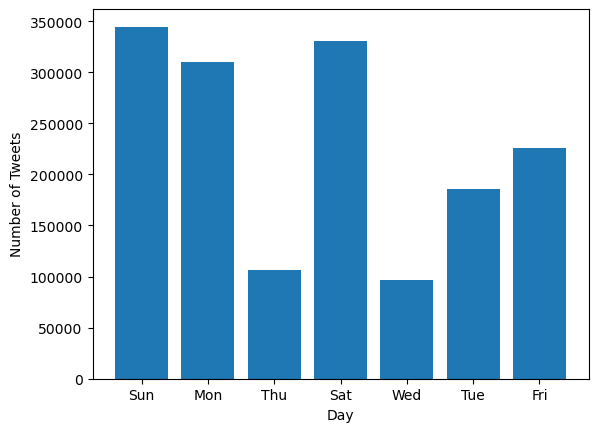

In [16]:
# Plot
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.bar(day_counts.toPandas()['Day'], day_counts.toPandas()['count'])
plt.show()

# Try to do stacked bar chart adding the positive and negative
# Also try to reorder the bars

In [36]:
# Month
month_counts = month.groupBy('Month').count()
month_counts.show()

+-----+------+
|Month| count|
+-----+------+
|  May|576367|
|  Jun|923608|
|  Apr|100025|
+-----+------+



In [33]:
pos_month_counts = month.filter(month.label == 4).groupBy('Month').count()
pos_month_counts.show()

+-----+------+
|Month| count|
+-----+------+
|  May|351545|
|  Jun|390037|
|  Apr| 58418|
+-----+------+



In [34]:
neg_month_counts = month.filter(month.label == 0).groupBy('Month').count()
neg_month_counts.show()

+-----+------+
|Month| count|
+-----+------+
|  May|224822|
|  Jun|533571|
|  Apr| 41607|
+-----+------+



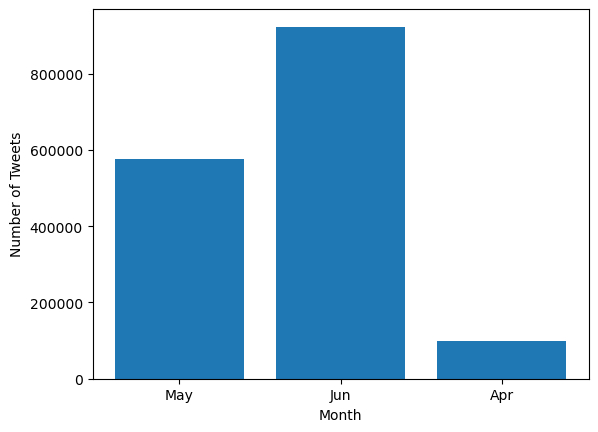

In [37]:
# Plot
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.bar(month_counts.toPandas()['Month'], month_counts.toPandas()['count'])
plt.show()

# Try to do stacked bar chart adding the positive and negative
# Also try to reorder the bars

In [39]:
# Year
year.groupBy('Year').count().show()

+----+-------+
|Year|  count|
+----+-------+
|2009|1600000|
+----+-------+



In [42]:
# Time
split_col = F.split(time['Time'], ':')

hour = time.withColumn('Hour', F.concat(split_col.getItem(0)))

hour_count = hour.groupBy('Hour').count()

hour_count.show(24)

+----+-----+
|Hour|count|
+----+-----+
|  07|83654|
|  15|50643|
|  11|61009|
|  01|75268|
|  22|78328|
|  16|55720|
|  18|53485|
|  00|80865|
|  17|51843|
|  09|67278|
|  05|78623|
|  19|57722|
|  23|84750|
|  08|76287|
|  03|74253|
|  02|73991|
|  06|80852|
|  20|57059|
|  10|60689|
|  12|51653|
|  04|76995|
|  13|49689|
|  21|68964|
|  14|50380|
+----+-----+



In [44]:
pos_hour_counts = hour.filter(hour.label == 4).groupBy('Hour').count()
pos_hour_counts.show(24)

+----+-----+
|Hour|count|
+----+-----+
|  07|41446|
|  15|22112|
|  11|29673|
|  01|44687|
|  22|39310|
|  16|24126|
|  18|24063|
|  00|45283|
|  17|22527|
|  09|30767|
|  05|40849|
|  19|26529|
|  23|45244|
|  08|36121|
|  03|42536|
|  02|43820|
|  06|40776|
|  20|26957|
|  10|29092|
|  12|23533|
|  04|42049|
|  13|22240|
|  21|32957|
|  14|23303|
+----+-----+



In [45]:
neg_hour_counts = hour.filter(hour.label == 0).groupBy('Hour').count()
neg_hour_counts.show(24)

+----+-----+
|Hour|count|
+----+-----+
|  07|42208|
|  15|28531|
|  11|31336|
|  01|30581|
|  22|39018|
|  16|31594|
|  18|29422|
|  00|35582|
|  17|29316|
|  09|36511|
|  05|37774|
|  19|31193|
|  23|39506|
|  08|40166|
|  03|31717|
|  02|30171|
|  06|40076|
|  20|30102|
|  10|31597|
|  12|28120|
|  04|34946|
|  13|27449|
|  21|36007|
|  14|27077|
+----+-----+



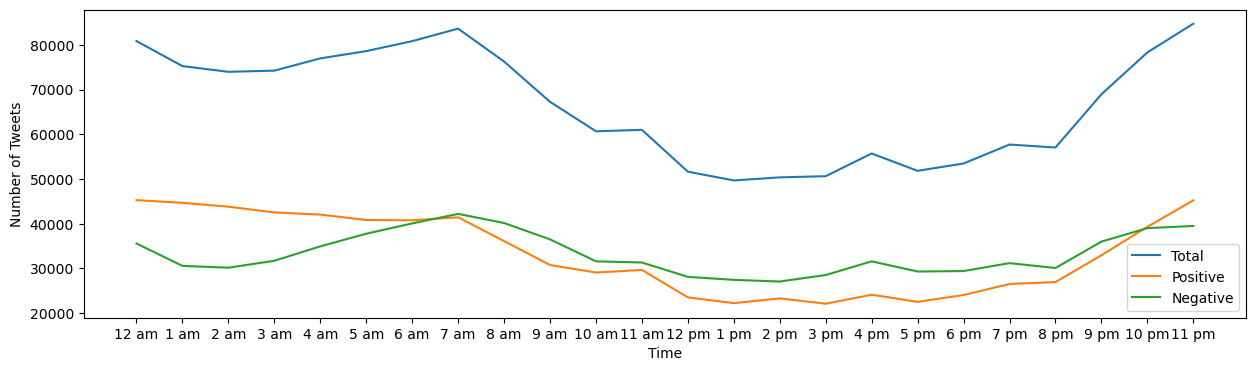

In [60]:
# Plot
hours = ['12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am',
         '8 am', '9 am', '10 am', '11 am', '12 pm', '1 pm', '2 pm', '3 pm', 
         '4 pm', '5 pm', '6 pm', '7 pm','8 pm', '9 pm', '10 pm', '11 pm']

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)

plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.plot(hours, hour_count.toPandas().sort_values(by='Hour')['count'], label = "Total")
plt.plot(hours, pos_hour_counts.toPandas().sort_values(by='Hour')['count'], label = "Positive")
plt.plot(hours, neg_hour_counts.toPandas().sort_values(by='Hour')['count'], label = "Negative")
plt.legend()
plt.show()